## 로지스틱 회귀

In [17]:
#! pip install sklearn

You should consider upgrading via the 'c:\users\dewqf\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [18]:
#! pip install matplot

You should consider upgrading via the 'c:\users\dewqf\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [19]:
# 위스콘신 유방암 데이터 로드하기
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [20]:
# Scaler 하기
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardSclaer()로 평균이 0, 분산 1인 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [24]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

# accuracy와 roc_auc 측정
print('accuracy : {0:.3f}'.format(accuracy_score(y_test, lr_pred)))
print('roc_auc : {0}'.format(roc_auc_score(y_test, lr_pred_proba)))

accuracy : 0.977
roc_auc : 0.9947089947089947


In [14]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# C가 작을수록 규제 강도가 쎄다rom sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# C가 작을수록 규제 강도가 쎄다
params = {'penalty' : ['l2', 'l1'],
            'C' : [0.01, 0.1, 1, 1, 5, 10]}

            grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
            grid_clf.fit(data_scaled, cancer.target)
            
params = {'penalty' : ['l2', 'l1'],
            'C' : [0.01, 0.1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터 : {0}, 최적 평균 정확도 : {1:.3f}'.format(grid_clf.best_params_,
                                                            grid_clf.best_score_))

최적 하이퍼 파라미터 : {'C': 1, 'penalty': 'l2'}, 최적 평균 정확도 : 0.975


## 5.8 회귀 트리

In [28]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# 보스턴 데이터 세트 로드
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5차 교차 검증의 개별 Negative MSE scores :', np.round(neg_mse_scores, 2))
print('5차 교차 검증의 개별 RMSE scores :', np.round(rmse_scores, 2))
print('5차 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5차 교차 검증의 개별 Negative MSE scores : [ -7.88 -13.14 -20.57 -46.23 -18.88]
5차 교차 검증의 개별 RMSE scores : [2.81 3.63 4.54 6.8  4.34]
5차 교차 검증의 평균 RMSE : 4.423


In [29]:
# 모델 평가하는 함수 생성 모델 평가하는 함수 생성
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
        rmse_scores = np.sqrt(-1 * neg_mse_scores)
            avg_rmse = np.mean(rmse_scores)
                print('#####', model.__class__.__name__, '#####')
                    print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('#####', model.__class__.__name__, '#####')
    print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

** 사이킷런의 여러 회귀 트리 클래스를 이용하여 회귀 예측 **

In [33]:

# ! pip install xgboost
# ! pip install lightgbm

You should consider upgrading via the 'c:\users\dewqf\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\dewqf\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

##### DecisionTreeRegressor #####
5 교차 검증의 평균 RMSE : 5.978
##### RandomForestRegressor #####
5 교차 검증의 평균 RMSE : 4.423
##### GradientBoostingRegressor #####
5 교차 검증의 평균 RMSE : 4.269
##### XGBRegressor #####
5 교차 검증의 평균 RMSE : 4.251
##### LGBMRegressor #####
5 교차 검증의 평균 RMSE : 4.646


In [37]:
# ! pip install seaborn

You should consider upgrading via the 'c:\users\dewqf\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.



** 회귀 트리는 선형 회귀의 회귀 계수 대신, 피처 중요도로 피처의 상대적 중요도를 알 수 있습니다. **

<AxesSubplot:>

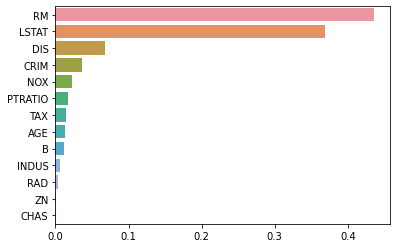

In [38]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 에제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.
rf_reg.fit(X_data, y_target)

# feature_importances_값을 얻을 수 있고 이를 시각화
feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x = feature_series, y = feature_series.index)

** 오버피팅을 시각화 하기 위해 한개의 피처 RM과 타겟값 PRICE기반으로 회귀 예측 수행 **

(100, 2)


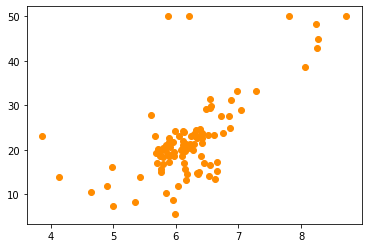

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

# 2차원으로 featrue, target을 넣어준다.
bostonDF_sample = bostonDF[['RM','PRICE']]
# sample메소드는 sample를 생성해준다.
bostonDF_sample = bostonDF_sample.sample(n=100,random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM , bostonDF_sample.PRICE,c="darkorange")

In [43]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 ~ 8.5 까지 100개 데이터 셋 생성. 
# 분할선을 보여주는 기능이 없어서 이걸 기준으로 분할선을 그리게된다.
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

# 학습과 예측 수행. 
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)


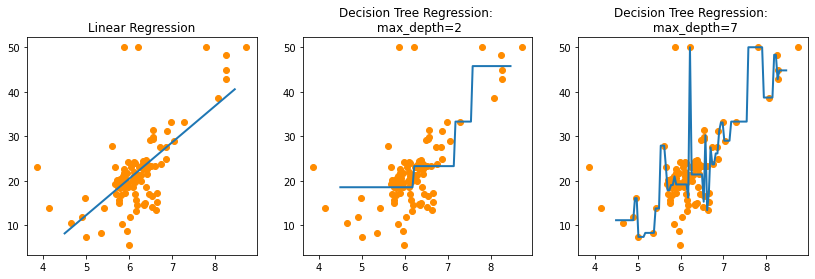

In [44]:
fig , (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# X축값을 4.5 ~ 8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선 
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr,label="linear", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선 
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_rf2, label="max_depth:3", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선 
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax3.plot(X_test, pred_rf7, label="max_depth:7", linewidth=2)